# ** ANALISIS DE DATOS**


In [4]:
# Importacion de paquetes a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer

In [6]:
# Cargamos los datos analizar
ruta = "C:\\UNIR\\VIDAMA\\8. TFM\\DatosTFM\\EncuestaTratada-v5.xlsx"
estudiantes = pd.read_excel(ruta, header=0)

In [8]:
# Visualizamos informacion general sobre los atributos del dataframe
estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   NivelCarrera                 419 non-null    int64
 1   Genero                       419 non-null    int64
 2   RangoEdad                    419 non-null    int64
 3   EstadoCivil                  419 non-null    int64
 4   Discapacidad                 419 non-null    int64
 5   Con-quien-Vive               419 non-null    int64
 6   Actividades-Realiza          419 non-null    int64
 7   TipoCalamidad                419 non-null    int64
 8   Sustenta-Hermanos            419 non-null    int64
 9   Sustenta-Padre               419 non-null    int64
 10  Sustenta-Madre               419 non-null    int64
 11  Sustenta-FamiliaresCercanos  419 non-null    int64
 12  Sustenta-YoPago              419 non-null    int64
 13  Sustenta-UniversidadBeca     419 non-null    int64

In [10]:
#  Obtenemos una descrpcion estadistica de las columnas numericas
estudiantes.describe()

,NivelCarrera,Genero,RangoEdad,EstadoCivil,Discapacidad,Con-quien-Vive,Actividades-Realiza,TipoCalamidad,Sustenta-Hermanos,Sustenta-Padre,Sustenta-Madre,Sustenta-FamiliaresCercanos,Sustenta-YoPago,Sustenta-UniversidadBeca,Sustenta-PrestamoFinanciero,Numero-Personas-familia,Zona-Colegio-Graduacion,Tipo-Colegio-Grado,Ingreso-mensual-Hogar,Deserto
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,1.985680,0.684964,2.322196,1.007160,0.023866,3.026253,0.894988,3.214797,0.031026,0.735084,0.689737,0.069212,0.112172,0.023866,0.002387,1.491647,0.804296,0.937947,2.178998,0.236277
std,1.102318,0.465085,1.036999,0.084414,0.152815,0.839673,1.110390,1.978756,0.173596,0.441816,0.463154,0.254118,0.315955,0.152815,0.048853,0.720049,0.397216,1.268298,2.169589,0.425302
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,3.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,5.000000,0.000000
max,4.000000,1.000000,6.000000,2.000000,1.000000,5.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,5.000000,1.000000


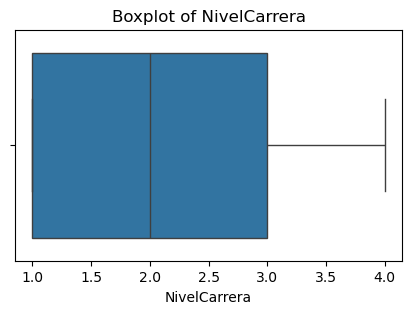

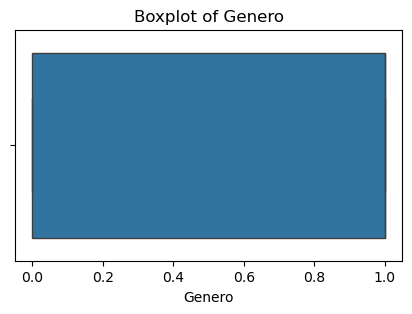

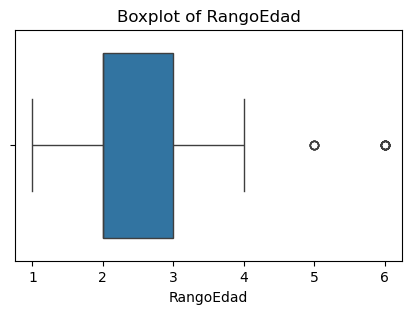

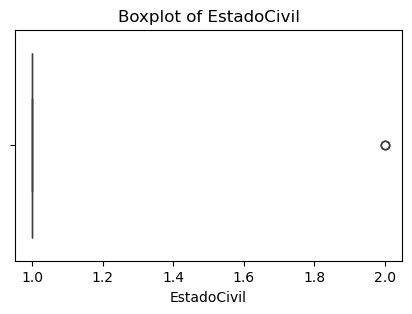

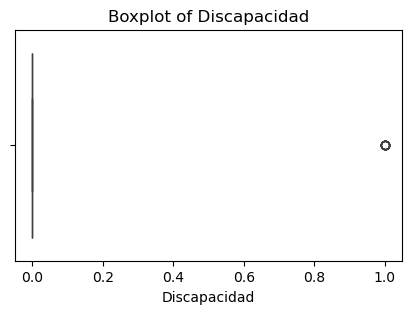

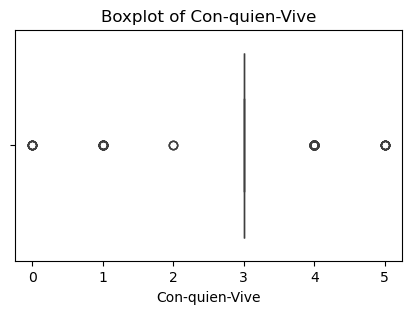

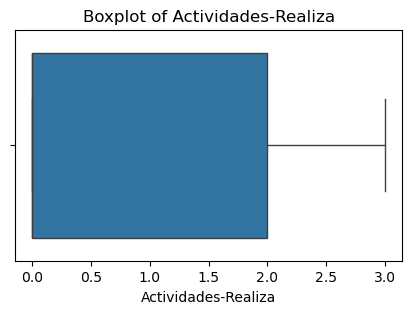

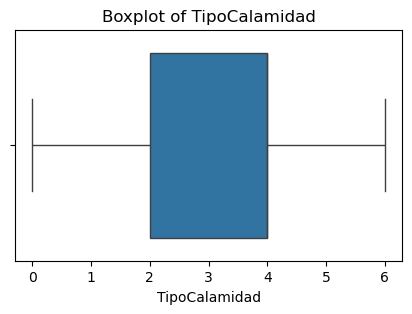

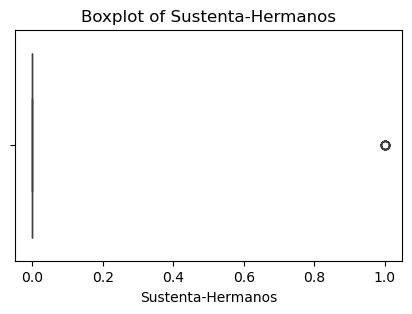

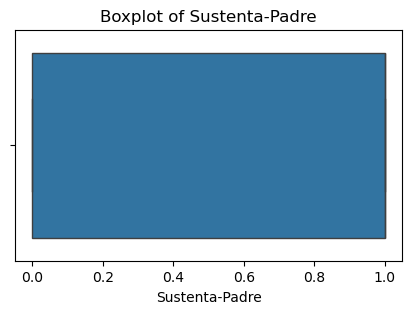

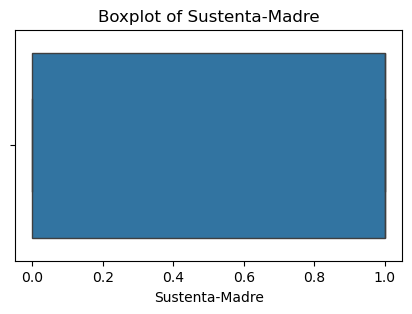

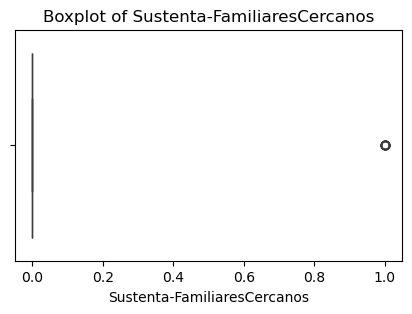

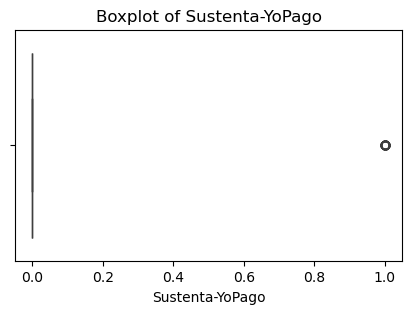

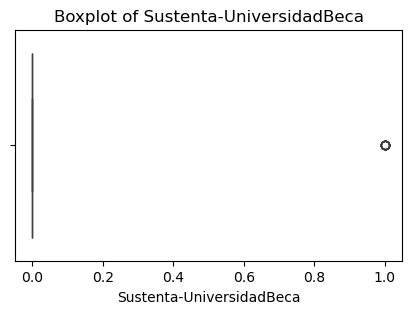

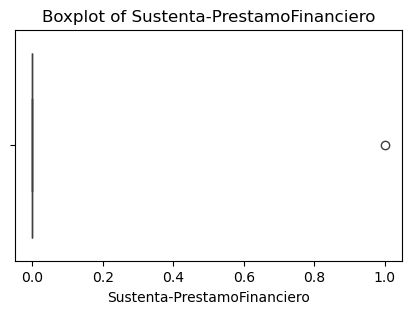

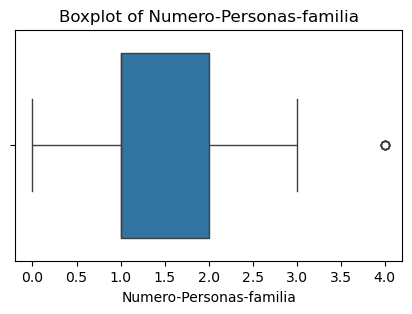

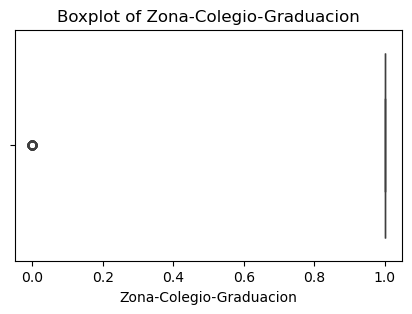

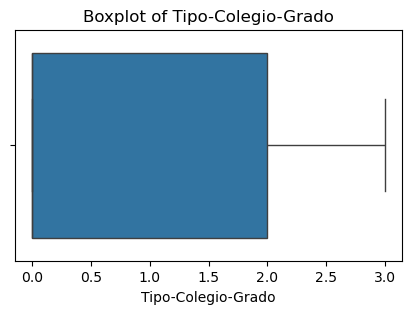

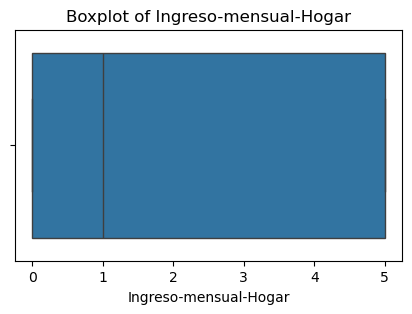

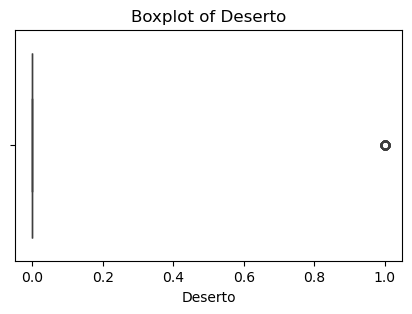

In [12]:
# COMPROBACION DE OUTLIERS
# Seleccionamos las columnas numéricas
num_cols = estudiantes.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(5, 3))  # Tamaño de la figura ajustado para una mejor visualización
    sns.boxplot(x=estudiantes[col].dropna())  # Usamos dropna() para eliminar valores NaN
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
#Nº de Outliers usando rango IQR
outliers={}

for col in num_cols:
  Q1 = np.percentile(estudiantes[col], 25)
  Q3 = np.percentile(estudiantes[col], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col]= (estudiantes[col] > upper_bound).sum() + (estudiantes[col]< lower_bound).sum()

print(outliers)

{'NivelCarrera': 0, 'Genero': 0, 'RangoEdad': 17, 'EstadoCivil': 3, 'Discapacidad': 10, 'Con-quien-Vive': 118, 'Actividades-Realiza': 0, 'TipoCalamidad': 0, 'Sustenta-Hermanos': 13, 'Sustenta-Padre': 0, 'Sustenta-Madre': 0, 'Sustenta-FamiliaresCercanos': 29, 'Sustenta-YoPago': 47, 'Sustenta-UniversidadBeca': 10, 'Sustenta-PrestamoFinanciero': 1, 'Numero-Personas-familia': 5, 'Zona-Colegio-Graduacion': 82, 'Tipo-Colegio-Grado': 0, 'Ingreso-mensual-Hogar': 0, 'Deserto': 99}


In [16]:
# calcular el porcentaje de valores faltantes (NaN) en cada columna del DataFrame data.
estudiantes.isna().sum() / len (estudiantes)

NivelCarrera                   0.0
Genero                         0.0
RangoEdad                      0.0
EstadoCivil                    0.0
Discapacidad                   0.0
Con-quien-Vive                 0.0
Actividades-Realiza            0.0
TipoCalamidad                  0.0
Sustenta-Hermanos              0.0
Sustenta-Padre                 0.0
Sustenta-Madre                 0.0
Sustenta-FamiliaresCercanos    0.0
Sustenta-YoPago                0.0
Sustenta-UniversidadBeca       0.0
Sustenta-PrestamoFinanciero    0.0
Numero-Personas-familia        0.0
Zona-Colegio-Graduacion        0.0
Tipo-Colegio-Grado             0.0
Ingreso-mensual-Hogar          0.0
Deserto                        0.0
dtype: float64

no existen valores nulos 

In [18]:
# Varianza de los datos
estudiantes.var()

NivelCarrera                   1.215105
Genero                         0.216304
RangoEdad                      1.075367
EstadoCivil                    0.007126
Discapacidad                   0.023352
Con-quien-Vive                 0.705051
Actividades-Realiza            1.232965
TipoCalamidad                  3.915474
Sustenta-Hermanos              0.030136
Sustenta-Padre                 0.195202
Sustenta-Madre                 0.214512
Sustenta-FamiliaresCercanos    0.064576
Sustenta-YoPago                0.099828
Sustenta-UniversidadBeca       0.023352
Sustenta-PrestamoFinanciero    0.002387
Numero-Personas-familia        0.518471
Zona-Colegio-Graduacion        0.157781
Tipo-Colegio-Grado             1.608580
Ingreso-mensual-Hogar          4.707118
Deserto                        0.180882
dtype: float64

<Axes: >

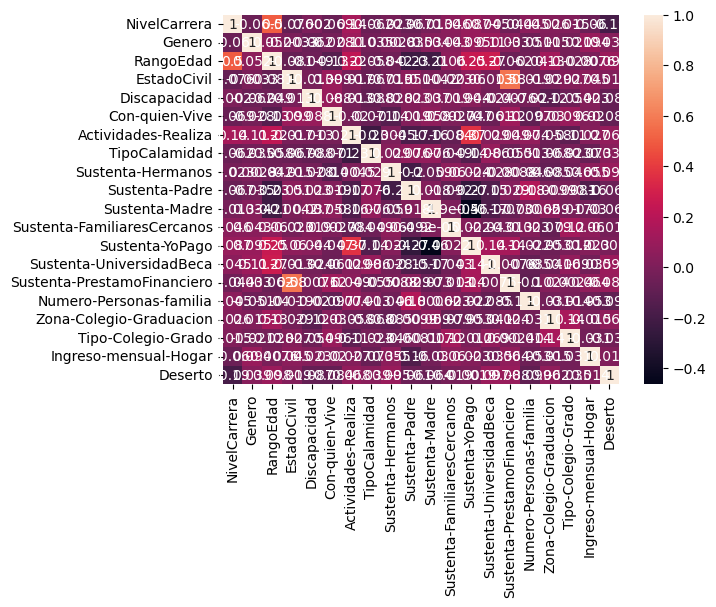

In [20]:
# Matriz de Correlacion
num_cols=estudiantes.select_dtypes(include='number').columns
matriz=estudiantes[num_cols].corr()
sns.heatmap(matriz,annot=True)

In [22]:
import pandas as pd

# Seleccionar solo las columnas numéricas
num_cols = estudiantes.select_dtypes(include='number').columns

# Calcular la matriz de correlación
matriz_correlacion = estudiantes[num_cols].corr()

# Mostrar la matriz en formato de tabla
print(matriz_correlacion)


                             NivelCarrera    Genero  RangoEdad  EstadoCivil  \
NivelCarrera                     1.000000 -0.060151   0.497959    -0.076026   
Genero                          -0.060151  1.000000   0.052232    -0.003345   
RangoEdad                        0.497959  0.052232   1.000000    -0.081076   
EstadoCivil                     -0.076026 -0.003345  -0.081076     1.000000   
Discapacidad                     0.002034 -0.062260  -0.048641    -0.013279   
Con-quien-Vive                  -0.069379 -0.027779  -0.133374     0.098598   
Actividades-Realiza              0.137540  0.107189   0.222674    -0.017483   
TipoCalamidad                   -0.062200 -0.035476  -0.058291    -0.066519   
Sustenta-Hermanos               -0.022677  0.002829  -0.042374    -0.015196   
Sustenta-Padre                  -0.066754 -0.034567  -0.230984     0.050980   
Sustenta-Madre                  -0.013409  0.033822  -0.214755    -0.004235   
Sustenta-FamiliaresCercanos      0.046249  0.043238 

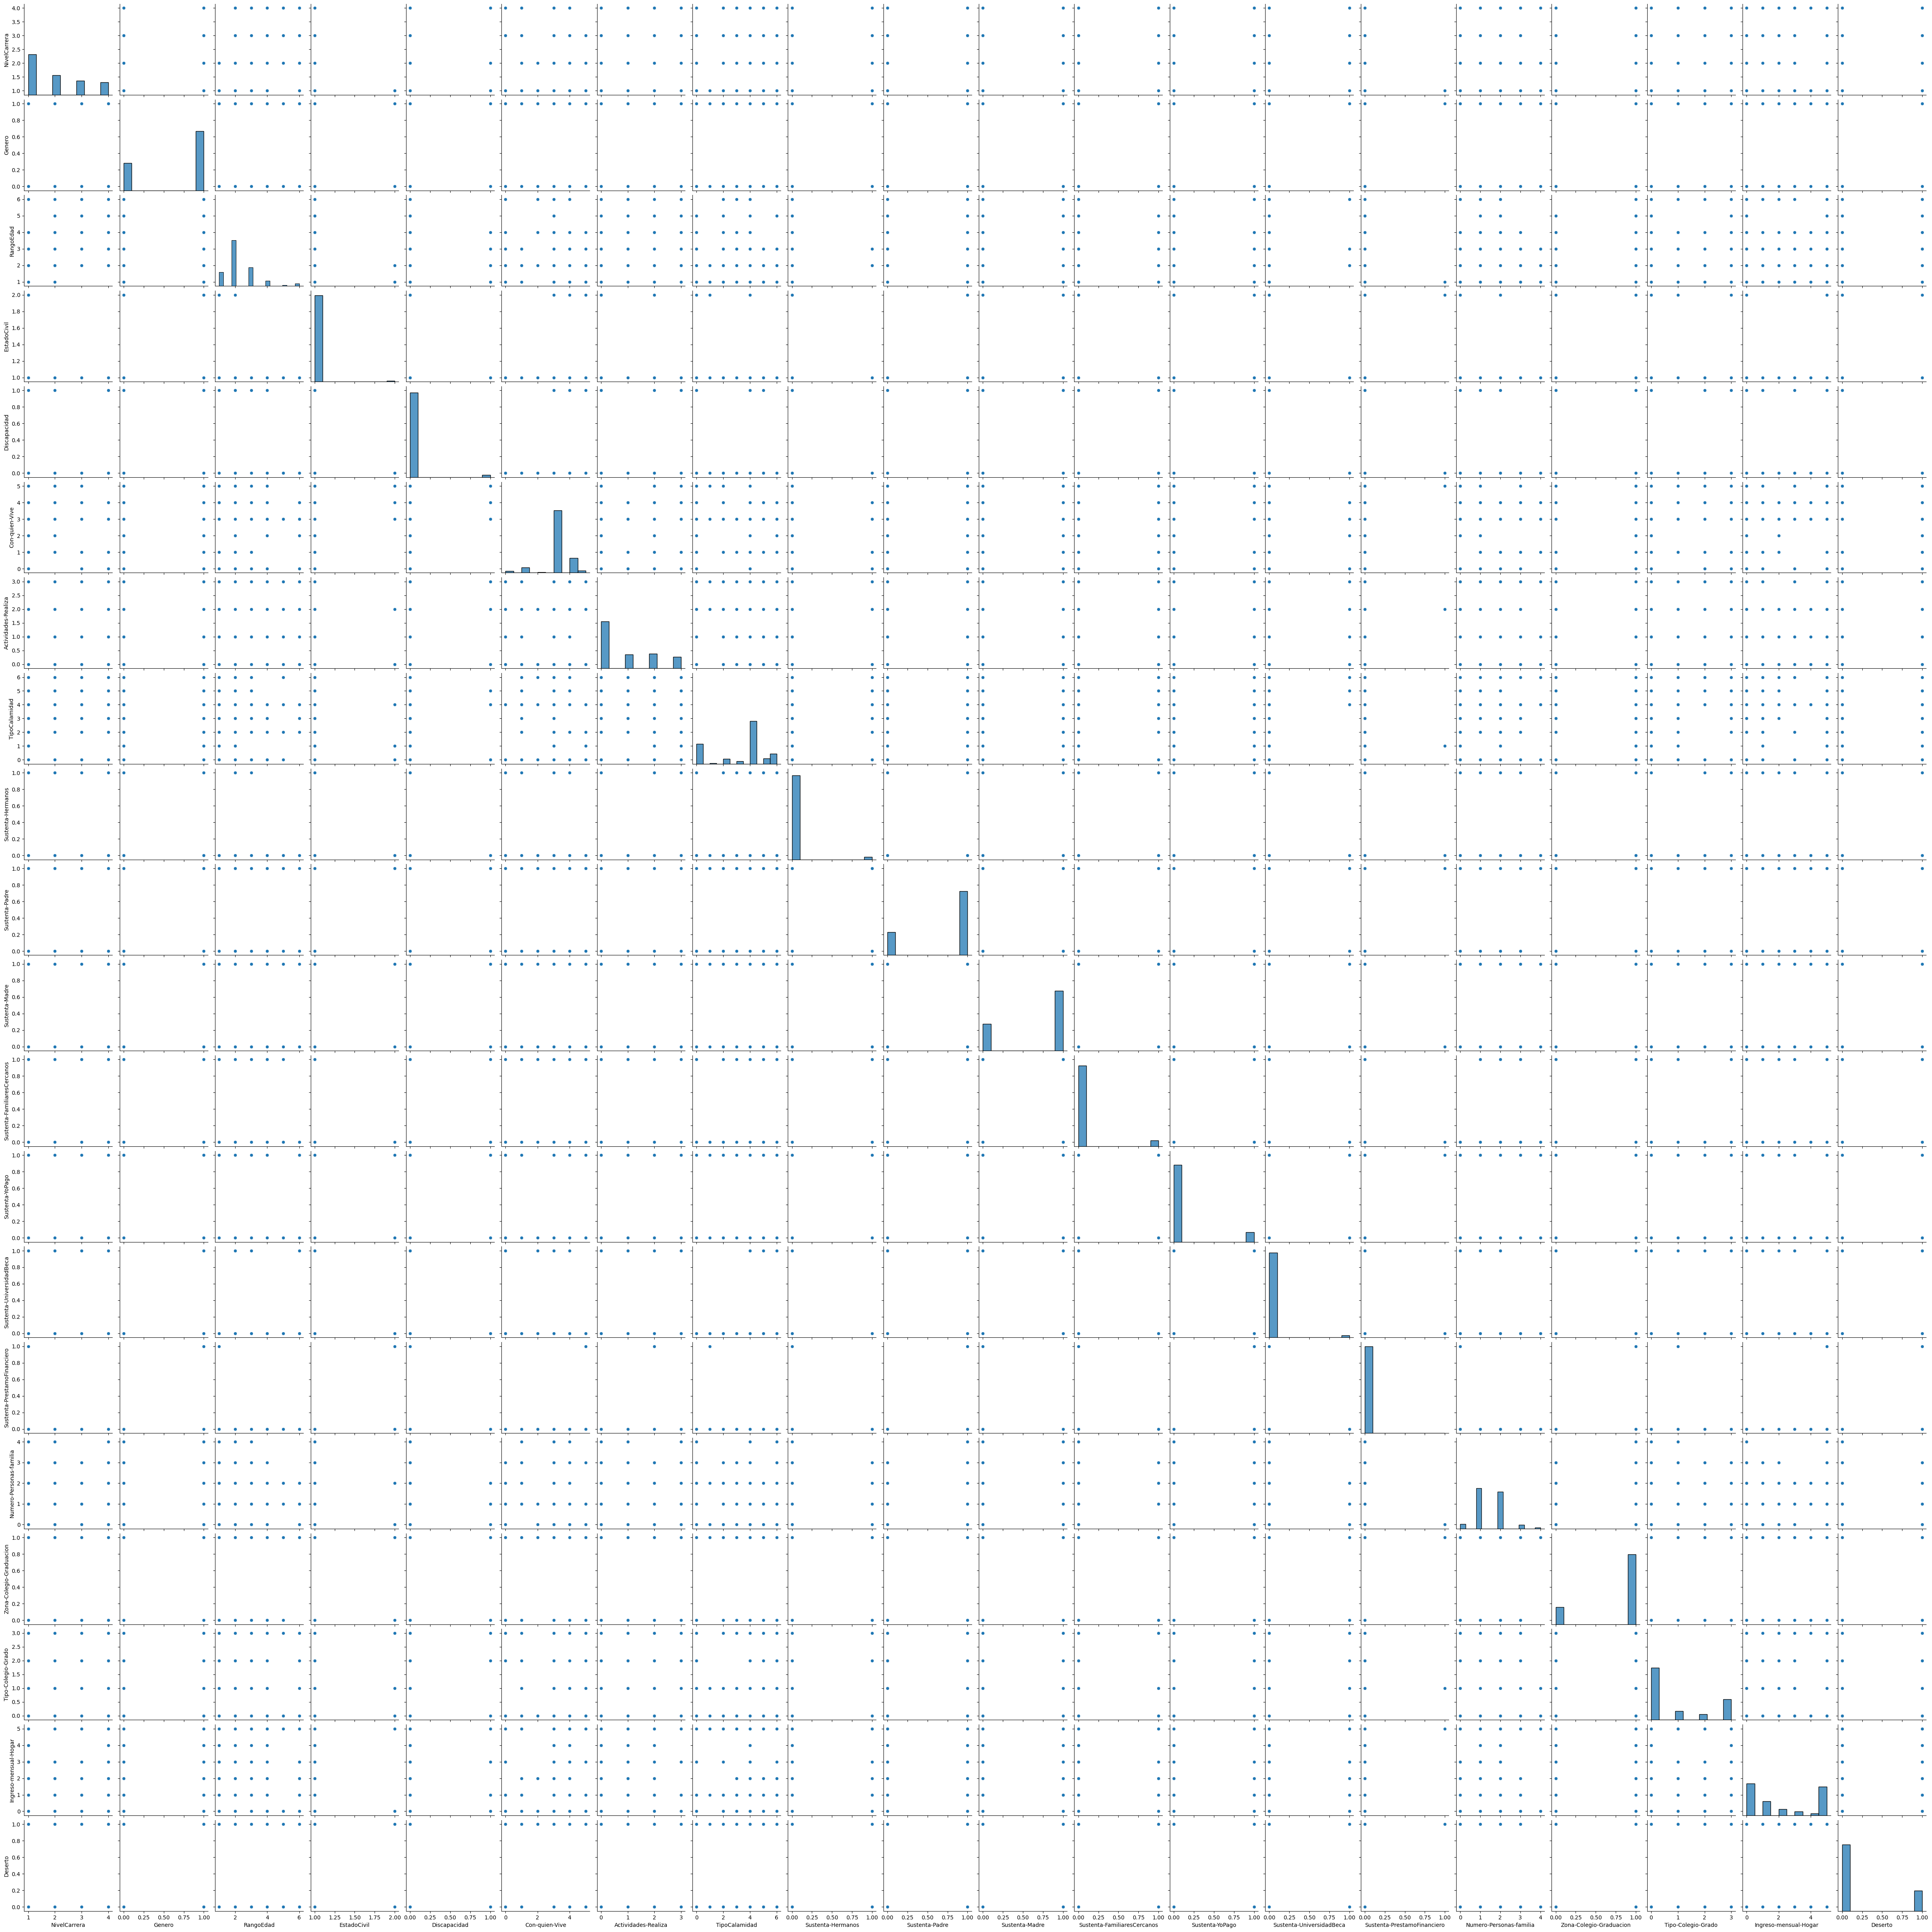

In [24]:
sns.pairplot(estudiantes)